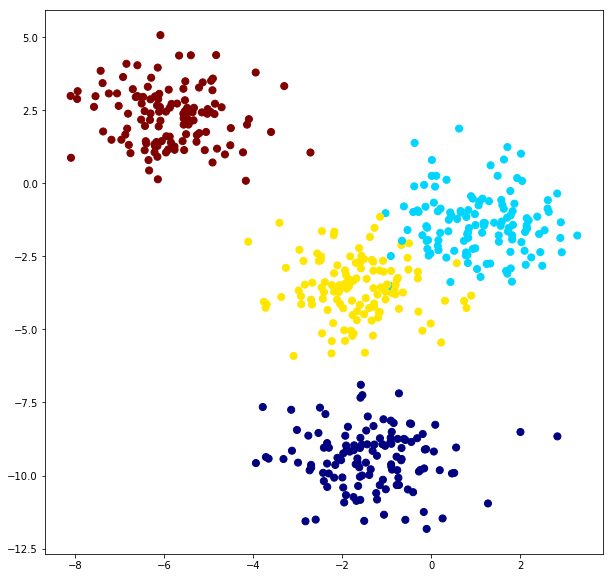

In [77]:
# Generate a dataset and plot it
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)
X, y = sklearn.datasets.make_blobs(n_samples=500, centers=4,
                  random_state=2, cluster_std=1)

#Scatter plot the points
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')

In [78]:
def plot_decision_boundary(pred_func):

    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01

    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    print(Z)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [3 3 3 ..., 1 1 1]
 [3 3 3 ..., 1 1 1]
 [3 3 3 ..., 1 1 1]]


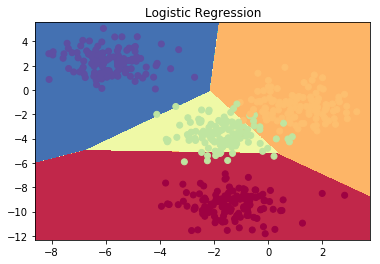

In [79]:
# Train the logistic rgeression classifier
import sklearn.linear_model
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)
 
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

In [80]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 4 # output layer dimensionality
 
# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [3 3 3 ..., 1 1 1]
 [3 3 3 ..., 1 1 1]
 [3 3 3 ..., 1 1 1]]


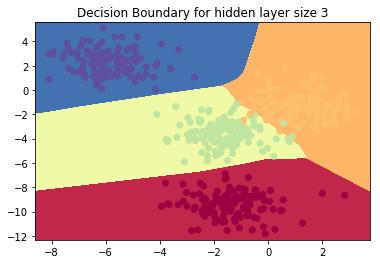

In [81]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(10,10))
mlp.fit(X,y)
plot_decision_boundary(lambda x: mlp.predict(x))
plt.title("Decision Boundary for hidden layer size 3")

In [82]:
# Helper function to evaluate the total loss on the dataset
import pandas as pd
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    #print(probs)
    # Calculating the loss
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [83]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    dj=pd.DataFrame(probs)
    print(dj)
    return np.argmax(probs, axis=1)

In [84]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
     
    # Initialize the parameters to random values. We need to learn these using gradient descent.
    np.random.seed(0)
    #weights of first layer to hidden layer
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    #baises from first to hidden
    b1 = np.zeros((1, nn_hdim))
    #weights of hidden to output.
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
 
    # This is what we return at the end
    model = {}
     
    # Gradient descent. For each batch...
    for i in xrange(0, num_passes):
 
        # Forward propagation
        z1 = X.dot(W1) + b1
        #activation function is tanh function.
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        #applying softmax function to get probablity of a variable classified for each class as we average along the axis=1.
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
 
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
 
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
 
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
         
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
         
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
            print "Loss after iteration %i: %f" %(i, calculate_loss(model))
     
    return model

Loss after iteration 0: 1.234728
Loss after iteration 1000: 0.195632
Loss after iteration 2000: 0.055150
Loss after iteration 3000: 0.052177
Loss after iteration 4000: 0.044072
Loss after iteration 5000: 0.045984
Loss after iteration 6000: 0.045924
Loss after iteration 7000: 0.045877
Loss after iteration 8000: 0.045840
Loss after iteration 9000: 0.045809
Loss after iteration 10000: 0.045783
Loss after iteration 11000: 0.045761
Loss after iteration 12000: 0.045742
Loss after iteration 13000: 0.045725
Loss after iteration 14000: 0.045709
Loss after iteration 15000: 0.045696
Loss after iteration 16000: 0.045683
Loss after iteration 17000: 0.045672
Loss after iteration 18000: 0.045661
Loss after iteration 19000: 0.045652
                    0         1         2         3
0        9.997676e-01  0.000065  0.000166  0.000001
1        9.997676e-01  0.000065  0.000166  0.000001
2        9.997676e-01  0.000065  0.000166  0.000001
3        9.997676e-01  0.000065  0.000166  0.000001
4        9.99

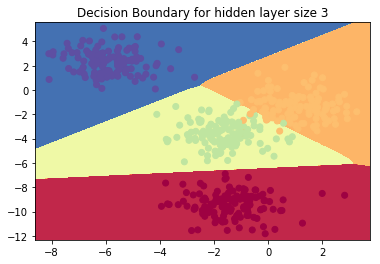

In [85]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)
 
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")